### Classification

In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

Memakai bank-addition-full.csv dikarenakan dataset ini mempunyai 41188 data points dengan 20 variabel. 

In [2]:
df = pd.read_csv("bank/bank-additional-full.csv", sep = ";")

#### Data Exploration 

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df_dup = df[df.duplicated(keep="last")]
df_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [9]:
df_dup.shape

(12, 21)

In [10]:
#Dropping duplicate rows
df = df.drop_duplicates()
df.shape

(41176, 21)

In [11]:
#Dropping kolom 'duration' -> karena durasi ini biasanya jika di acc oleh bank.
df = df.drop('duration', axis = 1)

In [12]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Data Visualization 

<AxesSubplot:xlabel='count', ylabel='job'>

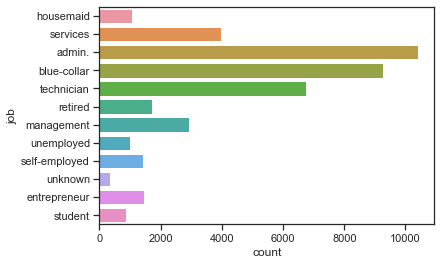

In [38]:
sns.set(style = "ticks", color_codes=True)
sns.countplot(y='education', data=df)

tipe pekerjaan yang paling banyak adalah admin.

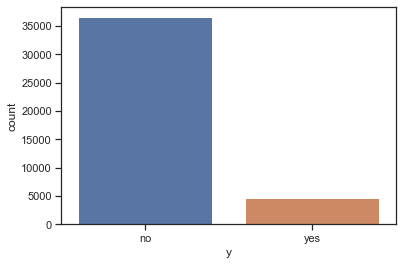

In [41]:
sns.countplot(x='y', data=df)
plt.show()

Dari visualisasi diatas bisa kita lihat bahwa client yang belum memiliki deposit berjangka masih sangat banyak ketimbang yang sudah punya, dari sini juga kita tahu bahwa data yang kita punya tidak seimbang.

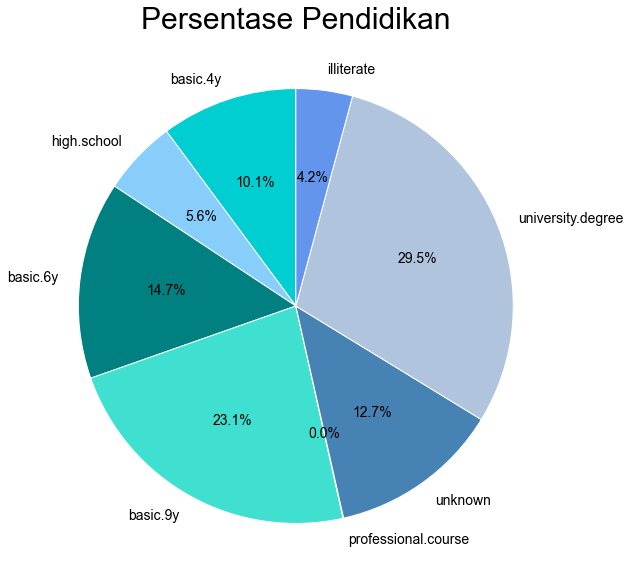

In [42]:
labels = df['education'].unique()
sizes = df.groupby(['education']).size()
plt.figure(figsize = (20,10))
ax = plt.axes()
plt.title('Persentase Pendidikan', fontsize = 30, color = 'Black')
ab=plt.pie(sizes, labels=labels, colors=colors, startangle=90,autopct='%1.1f%%', textprops={'fontsize': 14,'color':'Black'})
plt.show()

Persentase Pendidikan client paling banyak adalah gelar universitas atau sarjana.

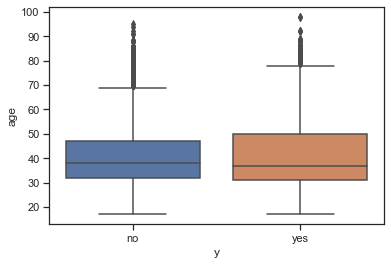

In [43]:
sns.boxplot(data=df, x="y", y="age")
plt.show()

untuk pelanggan yang memiliki atau tidak memiliki deposito berjangka, 
usia rata-rata sekitar 38–40 tahun. 
Dan boxplot untuk kedua kelas tumpang tindih cukup banyak, yang berarti bahwa usia tidak selalu merupakan indikator yang baik untuk pelanggan mana yang akan memiliki deposito berjangka dan pelanggan mana yang tidak.

Text(0.5, 1.05, 'Pearson correlation of Features')

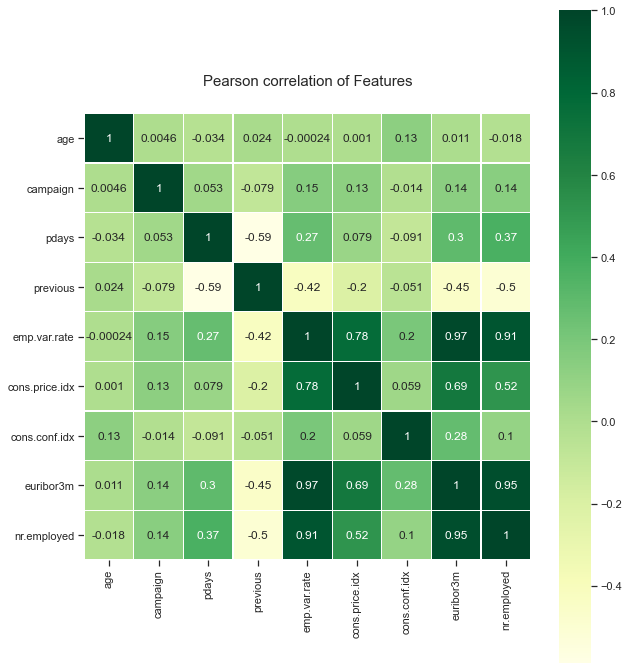

In [40]:
corr = df.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

Variable emp.var.rate, cons.price.idx, euribor3m dan nr.employed memiliki korelasi yang sangat tinggi. Dengan euribor3m dan nr.employed memiliki korelasi tertinggi 0,95.

#### Pre-Processing 

In [13]:
#Scale Numeric Data -> untuk menghindari outlier yang nantinya akan memperngaruhi model.
#Copying original DF
df_bank = df.copy()

In [14]:
df_bank.dropna()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [15]:
scaler = StandardScaler()
num_cols = ['age','campaign','pdays','previous']
df_bank[num_cols] = scaler.fit_transform(df_bank[num_cols])

In [16]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533143,housemaid,married,basic.4y,no,no,no,telephone,may,mon,-0.565963,0.195443,-0.349551,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1.629107,services,married,high.school,unknown,no,no,telephone,may,mon,-0.565963,0.195443,-0.349551,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,-0.290177,services,married,high.school,no,yes,no,telephone,may,mon,-0.565963,0.195443,-0.349551,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,-0.002284,admin.,married,basic.6y,no,no,no,telephone,may,mon,-0.565963,0.195443,-0.349551,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,1.533143,services,married,high.school,no,no,yes,telephone,may,mon,-0.565963,0.195443,-0.349551,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


OneHotEncoder -> from words to number. Akan mengubah misalnya :
Marital punya value : single, divorced, married. Maka :

marital_single : 1 = yes, 0 = no

marital_divorced : 1 = Yes, 0 = no

marital_married : 1 = Yes, 0 = no

Kolom yang akan kita ubah adalah :
Job, Marital, Education, default, housing, loan, contact, month, day_of_week,poutcome.

Jadi untuk mengubah words to number kita akan memakai OneHotEncoder, mengaplikasikan fungsi lambda. 
    

In [17]:
encoder = OneHotEncoder(sparse = False)
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']

#Akan meng-encode Categorical Data 
df_encoded = pd.DataFrame(encoder.fit_transform(df_bank[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

#Menggantikan categorical data dengan encoded data
df_bank = df_bank.drop(cat_cols, axis=1)
df_bank = pd.concat([df_encoded, df_bank], axis = 1)

#Encode Value
df_bank['y'] = df_bank['y'].apply(lambda x : 1 if x == 'yes' else 0)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
df_bank.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.533143,-0.565963,0.195443,-0.349551,1.1,93.994,-36.4,4.857,5191.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.629107,-0.565963,0.195443,-0.349551,1.1,93.994,-36.4,4.857,5191.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.290177,-0.565963,0.195443,-0.349551,1.1,93.994,-36.4,4.857,5191.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002284,-0.565963,0.195443,-0.349551,1.1,93.994,-36.4,4.857,5191.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.533143,-0.565963,0.195443,-0.349551,1.1,93.994,-36.4,4.857,5191.0,0


In [19]:
df_bank.fillna(0, inplace=True)

Split Dataset untuk Training dan Testing

Split data dengan ratio 80 : 20.

In [20]:
feature = df_bank.drop('y', axis = 1)

target = df_bank['y']

#Set Training and Testing 
X_train, X_test, y_train, y_test = train_test_split(feature, target,
                                                   shuffle = True,
                                                   test_size=0.2,
                                                   random_state=1)

#Print Training dan Testing
print("Jumlah Feature yang akan di Training : ", X_train.shape)
print("Jumlah Feature yang akan di Test : ", X_test.shape)
print("Jumlah Label yang akan di Training : ", y_train.shape)
print("Jumlah label yang ajan di Tes : ", y_test.shape)

Jumlah Feature yang akan di Training :  (32950, 62)
Jumlah Feature yang akan di Test :  (8238, 62)
Jumlah Label yang akan di Training :  (32950,)
Jumlah label yang ajan di Tes :  (8238,)


#### Logistic Regression 

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)

pred_cv = model.predict(X_test)
matrix = confusion_matrix(y_test, pred_cv)
print("Accuracy : \n", metrics.accuracy_score(y_test, pred_cv))
print("Confusion Matrix Logistic Regression : \n", matrix)
print("Classification Report: \n",classification_report(y_test, pred_cv))

Accuracy : 
 0.8970623937848993
Confusion Matrix Logistic Regression : 
 [[7185  109]
 [ 739  205]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.99      0.94      7294
           1       0.65      0.22      0.33       944

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.64      8238
weighted avg       0.88      0.90      0.87      8238



#### K-Nearest Neighbors

In [22]:
kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)

pred_cv1 = kNN.predict(X_test)
matrix1 = confusion_matrix(y_test, pred_cv1)
print("Accuracy :  \n", metrics.accuracy_score(y_test, pred_cv1))
print("Confusion Matrix K-Nearest Neighbors :  \n", matrix1)
print("Classification Report: \n",classification_report(y_test, pred_cv1))

Accuracy :  
 0.8879582422918184
Confusion Matrix K-Nearest Neighbors :  
 [[7064  230]
 [ 693  251]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7294
           1       0.52      0.27      0.35       944

    accuracy                           0.89      8238
   macro avg       0.72      0.62      0.65      8238
weighted avg       0.87      0.89      0.87      8238



#### Support Vector Machine 

In [23]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_predsvm = clf.predict(X_test)
matrix2 = confusion_matrix(y_test, y_predsvm)
print("Accuracy : \n", metrics.accuracy_score(y_test, y_predsvm))
print("Confusion Matrix Support Vector Machine : \n", matrix2)
print("Classification Report: \n",classification_report(y_test, y_predsvm))

Accuracy : 
 0.892571012381646
Confusion Matrix Support Vector Machine : 
 [[7164  130]
 [ 755  189]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7294
           1       0.59      0.20      0.30       944

    accuracy                           0.89      8238
   macro avg       0.75      0.59      0.62      8238
weighted avg       0.87      0.89      0.87      8238



#### Decision Tree 

In [24]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_predtree = clf.predict(X_test)
matrix3 = confusion_matrix(y_test, y_predtree)
print("Accuracy : \n", metrics.accuracy_score(y_test, y_predtree))
print("Confusion Matrix Decision Tree : \n", matrix3)
print("Classification Report: \n",classification_report(y_test, y_predtree))

Accuracy : 
 0.833211944646759
Confusion Matrix Decision Tree : 
 [[6552  742]
 [ 632  312]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      7294
           1       0.30      0.33      0.31       944

    accuracy                           0.83      8238
   macro avg       0.60      0.61      0.61      8238
weighted avg       0.84      0.83      0.84      8238



#### Random Forest 

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
matrix4 = confusion_matrix(y_test, pred_rf)
print("Accuracy : \n", metrics.accuracy_score(y_test, pred_rf))
print("Confusion Matrix Random Forest : \n", matrix4)
print("Classification Report: \n",classification_report(y_test, pred_rf))

Accuracy : 
 0.8920854576353484
Confusion Matrix Random Forest : 
 [[7107  187]
 [ 702  242]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7294
           1       0.56      0.26      0.35       944

    accuracy                           0.89      8238
   macro avg       0.74      0.62      0.65      8238
weighted avg       0.87      0.89      0.87      8238



#### Naive Bayes 

In [26]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
matrix5 = confusion_matrix(y_test, y_pred)
print("Accuracy : \n", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix Naive Bayes : \n", matrix5)
print("Classification Report: \n",classification_report(y_test, y_pred))

Accuracy : 
 0.8272638990046127
Confusion Matrix Naive Bayes : 
 [[6291 1003]
 [ 420  524]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.86      0.90      7294
           1       0.34      0.56      0.42       944

    accuracy                           0.83      8238
   macro avg       0.64      0.71      0.66      8238
weighted avg       0.87      0.83      0.84      8238



In [27]:
print("Logistic Regression : ",metrics.accuracy_score(y_test, pred_cv))
print("K-Nearest Neighbors : ", metrics.accuracy_score(y_test, pred_cv1))
print("Support Vector Machine : ", metrics.accuracy_score(y_test, y_predsvm))
print("Decision Tree : ", metrics.accuracy_score(y_test, y_predtree))
print("Random Forest : ", metrics.accuracy_score(y_test, pred_rf))
print("Naive Bayes : ", metrics.accuracy_score(y_test, y_pred))

Logistic Regression :  0.8970623937848993
K-Nearest Neighbors :  0.8879582422918184
Support Vector Machine :  0.892571012381646
Decision Tree :  0.833211944646759
Random Forest :  0.8920854576353484
Naive Bayes :  0.8272638990046127


Logistic Regression memperoleh akurasi paling tinggi dibandingkan KNN,SVM,Decision Tree, Random Forest, dan Naive Bayes. Oleh karena itu Logistic Regression adalah algoritma yang paling tepat untuk memprediksi Dataset Bank ini.